<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CUxx_Nombre del caso de uso</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > III - Feature Engineering Domain </font>
***
> # <font color='steelblue'> <b>16.- Feature Selection</font>

<font color='steelblue'>Feature Selection is the process where you automatically or manually select the most relevant features which contribute most to the correct output of the model.</font>


## <font color='steelblue'>Tasks</font>

<font color='steelblue'><b>Perform Selection of Categorical-Input/Categorical-Output</b>	
- Encoding-Categorical-Features
- Chi-Squared-Feature-Selection
- Mutual-Information-Feature-Selection
- Evaluate-a-Logistic-Regression-model
    
<font color='steelblue'><b>Perform Selection of Numerical-Input/Categorical-Output</b>	
- ANOVA-F-test-Feature-Selection
- Mutual-Information-Feature-Selection
- Evaluating-a-Logistic-Regression-model
- Tuning-the-Number-of-Selected-Features
    
<font color='steelblue'><b>Perform Selection of Numerical-Input/Numerical-Output</b>	
- Correlation-with-the-outcome-Feature-Selection
- Mutual-Information-Feature-Selection
- Evaluate-a-Lineal-Regression-model
- Tuning-the-Number-of-Selected-Features
    
<font color='steelblue'><b>Perform Selection of Any-data</b>	
- RFE-(Recursive-Feature-Elimination)
- Tuning-the-Number-of-Selected-Features
- Automatically-Select-the-Number-of-Features
    
<font color='steelblue'><b>Explore the use of diferent algorithms wrapped by RFE</b>	
    
<font color='steelblue'><b>Explore the use od Hybrid feature selection algorithms</b>	

## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: xxxxxxxxxx</font>
- <font color='steelblue'> <b>Output File: xxxxxxxxxx</font>

## <font color='green'>Settings</font>

In [1]:
# Libraries to use
import os
from pathlib import Path
import pandas as pd
import easygui as GUI
import numpy as np
import matplotlib.pyplot

## <font color='green'>Data Load</font>

In [4]:
current_path = os.getcwd()
path_origen = current_path
# Obtenemos el nombre del entorno que es el nombre del directorio raiz
raiz  = os.environ.get('CONDA_DEFAULT_ENV')
# Nos situamos en el directorio donde está el fichero (código) para carga de datos
os.chdir('C:\\' + raiz.__str__() + '\\CODE\\X - COMMON PROCEDURES\\')
# Ejecutamos el fichero
%run -i load_data.py
# No posicionamos de nuevo en el directorio origen
os.chdir(path_origen)
# Visualizamos el fichero cargado
data.head()

Uploaded File:
File name: diabetes.csv
File size:  (768, 9)
 
Generated Variables to use:
path_default: C:\Kapreolus\USE CASES\CLASSIFICATION\Binary\Diabetes\
path_data: C:\Kapreolus\USE CASES\CLASSIFICATION\Binary\Diabetes\Data\
file_data: C:\Kapreolus\USE CASES\CLASSIFICATION\Binary\Diabetes\Data\diabetes.csv
file_name: diabetes
Other variables: data, X, y, X_names, target(or y_name), target_index


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
from sklearn.model_selection import train_test_split
data_trans = data.values
# separate into input and output columns
X = data_trans[:, :-1]
y = data_trans[:, -1]
# separate into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (339, 13) (339,)
Test (167, 13) (167,)


## Selecting Categorical Input / Categorical Output

Use dataset as example: breast cancer

### Encoding Categorical Features

In [29]:
# Encoding variables
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
# ordinal encode input variables
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_train)
X_train = ordinal_encoder.transform(X_train)
X_test = ordinal_encoder.transform(X_test)
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (191, 9) (191,)
Test (95, 9) (95,)


### Chi-Squared Feature Selection

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


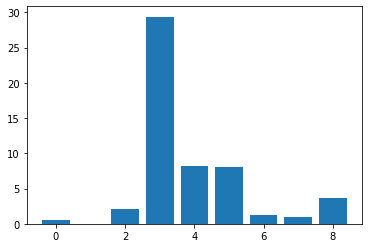

In [15]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Mutual Information Feature Selection

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

Feature 0: 0.000000
Feature 1: 0.027698
Feature 2: 0.055480
Feature 3: 0.027437
Feature 4: 0.019809
Feature 5: 0.110287
Feature 6: 0.000000
Feature 7: 0.047480
Feature 8: 0.016403


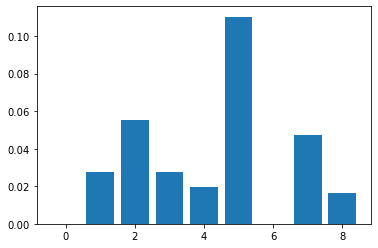

In [26]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Evaluating a Logistic Regression model

<font color='tomato'>Select numer of Features to use</font>

In [37]:
# Select numer of Features to use
f=4

<font color='darkgrey'><b>Operation</font>

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Without feature selection
# =========================
X_train_fs = X_train
X_test_fs = X_test
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('All Features Accuracy: %.2f' % (accuracy*100))

# Chi-Squared
# ===========
fs = SelectKBest(score_func=chi2, k=f)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Chi-Squared Accuracy: %.2f' % (accuracy*100))

# Mutual
# ======   
fs = SelectKBest(score_func=mutual_info_classif, k=f)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Mutual Accuracy: %.2f' % (accuracy*100))

## Selecting Numerical Input / Categorical Output

Use dataset as example: diabetes

### ANOVA F-test Feature Selection

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

Feature 0: 16.527385
Feature 1: 131.325562
Feature 2: 0.042371
Feature 3: 1.415216
Feature 4: 12.778966
Feature 5: 49.209523
Feature 6: 13.377142
Feature 7: 25.126440


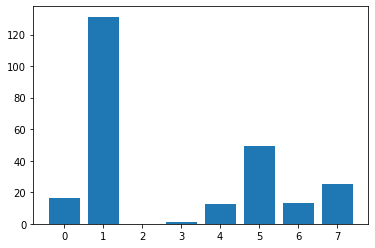

In [12]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Mutual Information Feature Selection

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

Feature 0: 0.000000
Feature 1: 0.112420
Feature 2: 0.057067
Feature 3: 0.035355
Feature 4: 0.037000
Feature 5: 0.073783
Feature 6: 0.018491
Feature 7: 0.053159


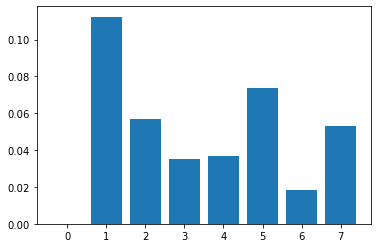

In [17]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Evaluating a Logistic Regression model

<font color='tomato'>Selecting feature to use</font>

In [33]:
# Select numer of Features to use
f=4

<font color='darkgrey'><b>Operation</font>

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Without feature selection
# =========================
X_train_fs = X_train
X_test_fs = X_test
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('All features Accuracy: %.2f' % (accuracy*100))

# Anova
# =====
fs = SelectKBest(score_func=f_classif, k=f)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Anova Accuracy: %.2f' % (accuracy*100))

# Mutual
# ======
fs = SelectKBest(score_func=mutual_info_classif, k=f)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Mutual Accuracy: %.2f' % (accuracy*100))

### Tuning the Number of Selected Features

#### Know the best number of features to select

In [61]:
# compare different numbers of features selected using anova f-test
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear')
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X.shape[1])]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 0.770
Best Config: {'anova__k': 5}


#### See the relationship between the number of selected features and accuracy

>1 0.748 (0.048)
>2 0.756 (0.042)
>3 0.761 (0.044)
>4 0.759 (0.042)
>5 0.770 (0.041)
>6 0.766 (0.042)
>7 0.770 (0.042)
>8 0.769 (0.040)


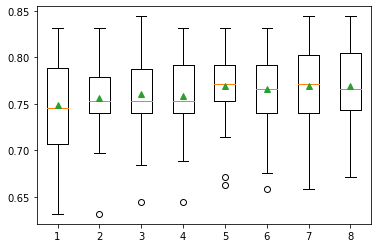

In [60]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define number of features to evaluate
num_features = [i+1 for i in range(X.shape[1])]
# enumerate each number of features
results = list()
for k in num_features:
    # create pipeline
    model = LogisticRegression(solver='liblinear')
    fs = SelectKBest(score_func=f_classif, k=k)
    pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
    # evaluate the model
    scores = evaluate_model(pipeline, X, y)
    results.append(scores)
    # summarize the results
    print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()

## Selecting Numerical Input / Numerical Output

Use dataset as example: boston houses

### Correlation with the outcome Feature Selection

In [13]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# feature selection
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 66.072886
Feature 1: 65.316374
Feature 2: 98.550174
Feature 3: 12.941974
Feature 4: 88.025960
Feature 5: 295.614562
Feature 6: 72.695680
Feature 7: 34.624005
Feature 8: 53.685558
Feature 9: 81.178987
Feature 10: 119.831783
Feature 11: 39.638673
Feature 12: 407.705851


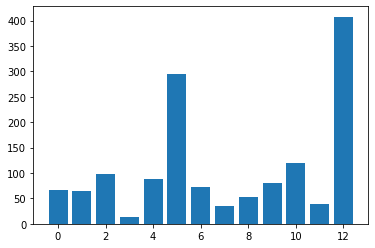

In [12]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Mutual Information Feature Selection

In [17]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
# feature selection
# configure to select all features
fs = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.314024
Feature 1: 0.205324
Feature 2: 0.510498
Feature 3: 0.012513
Feature 4: 0.438732
Feature 5: 0.488020
Feature 6: 0.341185
Feature 7: 0.292928
Feature 8: 0.207788
Feature 9: 0.356782
Feature 10: 0.446138
Feature 11: 0.165344
Feature 12: 0.693709


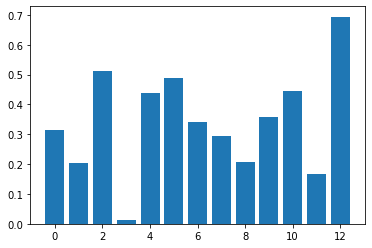

In [18]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Evaluating a Lineal Regression model

<font color='tomato'>Selecting feature to use</font>

In [33]:
# Select numer of Features to use
f=4

<font color='darkgrey'><b>Operation</font>

In [89]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Without feature selection
# =========================
X_train_fs = X_train
X_test_fs = X_test
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('All features MAE: %.3f' % mae)

# Correlation
# ===========
fs_c = SelectKBest(score_func=f_regression, k=f)
fs_c.fit(X_train, y_train)
X_train_fs = fs_c.transform(X_train)
X_test_fs = fs_c.transform(X_test)
# fit the model
model_c = LinearRegression()
model_c.fit(X_train_fs, y_train)
# evaluate the model
yhat = model_c.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('Correlation MAE: %.3f' % mae)

# Mutual
# ======
fs_m = SelectKBest(score_func=mutual_info_regression, k=f)
fs_m.fit(X_train, y_train)
X_train_fs = fs_m.transform(X_train)
X_test_fs = fs_m.transform(X_test)
# fit the model
model_m = LinearRegression()
model_m.fit(X_train_fs, y_train)
# evaluate the model
yhat = model_m.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('Mutual MAE: %.3f' % mae)

MAE: 3.417
Correlation MAE: 3.869
Mutual MAE: 3.869


### Tuning the Number of Selected Features

#### Know the best number of features to select

In [94]:
# compare different numbers of features selected using mutual information
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(1, X.shape[1]+1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print('>%.3f with: %r' % (mean, param))

Best MAE: -3.391
Best Config: {'sel__k': 13}
>-4.522 with: {'sel__k': 1}
>-4.036 with: {'sel__k': 2}
>-3.966 with: {'sel__k': 3}
>-3.901 with: {'sel__k': 4}
>-3.694 with: {'sel__k': 5}
>-3.673 with: {'sel__k': 6}
>-3.678 with: {'sel__k': 7}
>-3.635 with: {'sel__k': 8}
>-3.556 with: {'sel__k': 9}
>-3.538 with: {'sel__k': 10}
>-3.485 with: {'sel__k': 11}
>-3.398 with: {'sel__k': 12}
>-3.391 with: {'sel__k': 13}


#### See the relationship between the number of selected features and MAE

>1 -4.522 (0.482)
>2 -4.002 (0.521)
>3 -3.964 (0.571)
>4 -3.860 (0.557)
>5 -3.694 (0.542)
>6 -3.676 (0.546)
>7 -3.673 (0.548)
>8 -3.639 (0.513)
>9 -3.556 (0.522)
>10 -3.546 (0.503)
>11 -3.495 (0.499)
>12 -3.398 (0.521)
>13 -3.391 (0.530)


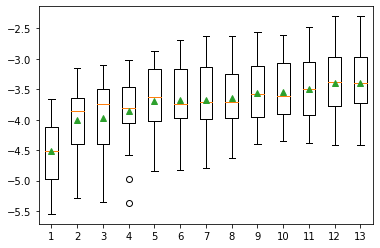

In [95]:
# compare different numbers of features selected using mutual information
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
# define number of features to evaluate
num_features = [i for i in range(1, X.shape[1]+1)]
# enumerate each number of features
results = list()
for k in num_features:
    # create pipeline
    model = LinearRegression()
    fs = SelectKBest(score_func=mutual_info_regression, k=k)
    pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
    # evaluate the model
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv,
        n_jobs=-1)
    results.append(scores)
    # summarize the results
    print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()

## Any data: RFE (Recursive Feature Elimination)

### RFE for Classification

Use dataset as example: diabetes

<font color='tomato'>Selecting feature to use</font>

In [8]:
# Select numer of Features to use
f=5

<font color='darkgrey'><b>Operation</font>

In [104]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=f)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('RFE Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

RFE Accuracy: 0.701 (0.052)


In [9]:
# make a prediction with an RFE pipeline
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=f)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
pipeline.fit(X_train, y_train)
# make a prediction for one example
yhat = pipeline.predict(X_test)

In [28]:
# Accuracy of prediction
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,yhat)
print('Predicted Accuracy: %.2f' % (acc*100))

Predicted Accuracy: 69.69


In [12]:
# Reporting which features were selected by RFE
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=True, Rank: 1
Column: 1, Selected=False, Rank: 5
Column: 2, Selected=False, Rank: 2
Column: 3, Selected=False, Rank: 3
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=True, Rank: 1
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=True, Rank: 1
Column: 8, Selected=False, Rank: 4
Column: 9, Selected=True, Rank: 1
Column: 10, Selected=True, Rank: 1
Column: 11, Selected=True, Rank: 1
Column: 12, Selected=True, Rank: 1


### RFE for Regression

Use dataset as example: boston houses

<font color='tomato'>Selecting feature to use</font>

In [16]:
# Select numer of Features to use
f=5

<font color='darkgrey'><b>Operation</font>

In [17]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=f)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv,
    n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -3.099 (0.573)


In [18]:
# make a prediction with an RFE pipeline
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=f)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
pipeline.fit(X_train, y_train)
# make a prediction for one example
yhat = pipeline.predict(X_test)

In [19]:
# Evaluate predictions
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.065


In [20]:
# Reporting which features were selected by RFE
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=True, Rank: 1
Column: 1, Selected=False, Rank: 9
Column: 2, Selected=False, Rank: 6
Column: 3, Selected=False, Rank: 7
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=True, Rank: 1
Column: 6, Selected=False, Rank: 3
Column: 7, Selected=True, Rank: 1
Column: 8, Selected=False, Rank: 8
Column: 9, Selected=False, Rank: 2
Column: 10, Selected=False, Rank: 4
Column: 11, Selected=False, Rank: 5
Column: 12, Selected=True, Rank: 1


### Tuning the Number of Selected Features

####  RFE for Classification

Use dataset as example: diabetes

<font color='tomato'>Selecting feature to use</font>

In [22]:
# Select range [f..l] of Features to evaluate
f=2
l=10

<font color='darkgrey'><b>Operation</font>

>2 0.681 (0.043)
>3 0.684 (0.066)
>4 0.685 (0.056)
>5 0.703 (0.056)
>6 0.703 (0.052)
>7 0.694 (0.065)
>8 0.699 (0.056)
>9 0.700 (0.057)


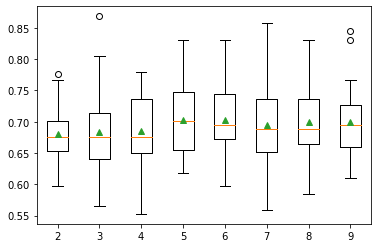

In [23]:
# explore the number of selected features for RFE in Classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(f, l):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [12]:
# Reporting which features were selected by RFECV
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=True, Rank: 1
Column: 1, Selected=False, Rank: 5
Column: 2, Selected=False, Rank: 2
Column: 3, Selected=False, Rank: 3
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=True, Rank: 1
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=True, Rank: 1
Column: 8, Selected=False, Rank: 4
Column: 9, Selected=True, Rank: 1
Column: 10, Selected=True, Rank: 1
Column: 11, Selected=True, Rank: 1
Column: 12, Selected=True, Rank: 1


####  RFE for Regression

Use dataset as example: Boston houses

<font color='tomato'>Selecting feature to use</font>

In [8]:
# Select range [f..l] of Features to evaluate
f=2
l=10

<font color='darkgrey'><b>Operation</font>

>2 -4.076 (0.684)
>3 -3.461 (0.520)
>4 -3.233 (0.455)
>5 -3.064 (0.496)
>6 -2.913 (0.576)
>7 -2.869 (0.551)
>8 -2.975 (0.651)
>9 -2.910 (0.483)


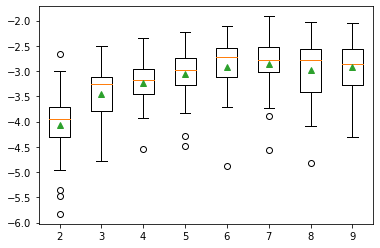

In [11]:
# explore the number of selected features for RFE in Classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(f, l):
        rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=i)
        model = DecisionTreeRegressor()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [12]:
# Reporting which features were selected by RFECV
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=True, Rank: 1
Column: 1, Selected=False, Rank: 5
Column: 2, Selected=False, Rank: 2
Column: 3, Selected=False, Rank: 3
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=True, Rank: 1
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=True, Rank: 1
Column: 8, Selected=False, Rank: 4
Column: 9, Selected=True, Rank: 1
Column: 10, Selected=True, Rank: 1
Column: 11, Selected=True, Rank: 1
Column: 12, Selected=True, Rank: 1


### Automatically Select the Number of Features

####  RFE for Classification

Use dataset as example: diabetes

In [19]:
# automatically select the number of features for RFE
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.691 (0.063)


In [12]:
# Reporting which features were selected by RFECV
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=True, Rank: 1
Column: 1, Selected=False, Rank: 5
Column: 2, Selected=False, Rank: 2
Column: 3, Selected=False, Rank: 3
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=True, Rank: 1
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=True, Rank: 1
Column: 8, Selected=False, Rank: 4
Column: 9, Selected=True, Rank: 1
Column: 10, Selected=True, Rank: 1
Column: 11, Selected=True, Rank: 1
Column: 12, Selected=True, Rank: 1


####  RFE for Regression

Use dataset as example: Boston houses

In [9]:
# automatically select the number of features for RFE
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# create pipeline
rfe = RFECV(estimator=DecisionTreeRegressor())
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -3.059 (0.637)


In [12]:
# Reporting which features were selected by RFECV
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=True, Rank: 1
Column: 1, Selected=False, Rank: 5
Column: 2, Selected=False, Rank: 2
Column: 3, Selected=False, Rank: 3
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=True, Rank: 1
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=True, Rank: 1
Column: 8, Selected=False, Rank: 4
Column: 9, Selected=True, Rank: 1
Column: 10, Selected=True, Rank: 1
Column: 11, Selected=True, Rank: 1
Column: 12, Selected=True, Rank: 1


## Exploring the use of diferent algorithms wrapped by RFE

####  RFE for Classification

Use dataset as example: diabetes

>lr 0.696 (0.055)
>per 0.643 (0.054)
>cart 0.695 (0.058)
>rf 0.695 (0.056)
>gbm 0.693 (0.059)


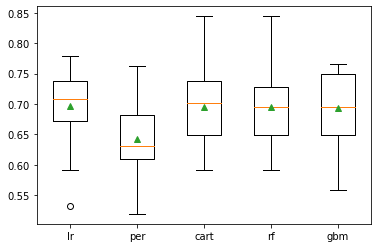

In [8]:
# explore the algorithm wrapped by RFE in Classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

# get a list of models to evaluate
def get_models():
    models = dict()
    # lr
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # perceptron
    rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
    # cart
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

####  RFE for Regression

Use dataset as example: Boston houses

>cart -3.059 (0.531)
>rf -3.104 (0.545)
>gbm -2.975 (0.524)


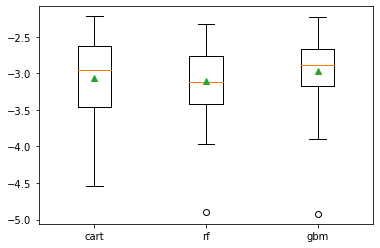

In [9]:
# explore the algorithm wrapped by RFE in Classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline

# get a list of models to evaluate
def get_models():
    models = dict()
    # cart
    rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
    model = DecisionTreeRegressor()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf
    rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=5)
    model = DecisionTreeRegressor()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm
    rfe = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=5)
    model = DecisionTreeRegressor()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Hybrid feature selection algorithms

####  Feature shuffling

<font color='tomato'>Por implementar</font>

https://www.kdnuggets.com/2021/12/alternative-feature-selection-methods-machine-learning.html

####  Feature performance

<font color='tomato'>Por implementar</font>

https://www.kdnuggets.com/2021/12/alternative-feature-selection-methods-machine-learning.html

####  Target mean performance

<font color='tomato'>Por implementar</font>

https://www.kdnuggets.com/2021/12/alternative-feature-selection-methods-machine-learning.html

## <font color='green'>Data Save</font>

<font color='tomato'> Identificamos los datos a guardar</font>

In [7]:
data_to_save = data

<font color='tomato'>Extensión añadida al nombre del fichero: será el número del proceso que lo genera (e.g. diabetes_06).</font>

<font color='tomato'>En caso de generarse varios ficheros llevarán _01 _02 ... después (e.g. diabetes_06_01).</font>

In [8]:
# Proceso 07
extension='_07'

<font color='tomato'><b> OPCION A:</b> Uso de la librería "easygui" para mayor comodidad</font>

In [11]:
# Guardamos el fichero
file_save=basename(file_data).replace('.csv',extension+'.csv')
path_save="Data/Output/"+file_save
path_out=GUI.filesavebox(title='Save Data File',default=path_save)
data_to_save.to_csv(path_out, index=False)
print('Falie saved as:')
path_out

Falie saved as:


<font color='tomato'><b> OPCION B:</b> Uso del código que va a Pilot Deploy</font>

In [10]:
file_save=basename(file_name).replace('.csv',extension+'.csv')
data_to_save.to_csv('Data/Output/' + file_save, index=False)

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

Ejemplos
- Se han modificado los nombres de las columnas
- Se han eliminado blancos en los nombres de las columnas
- Se han traducido los nombres de las columnas

## <font color=' #2874a6 '>Main Conclusions</font>

Ejemplos
- Los nombre de las columnas de origen son muy largos lo que provoca que ...
- ......

## <font color='RED'>CODE TO DEPLOY</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- xxxxxx
- xxxxxx
- xxxxxx

<font color=' red '><b>CODE</b></font>

In [1]:
# 
